### Importing Libraries

In [1]:
# 1 
# Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Reading and inspecting csv files

In [2]:
# load rankings data
wood_df = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
wood_df.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


In [3]:
# load rankings data
steel_df = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
steel_df.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


### Function to plot rankings over time for 1 roller coaster

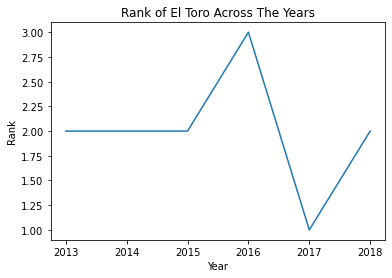

<Figure size 432x288 with 0 Axes>

In [4]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
def plot_roller_coaster(name, df, park_name):
    df = df[(df['Name'] == name) & (df['Park'] == park_name)]
    plt.plot(df['Year of Rank'][df['Name'] == name], df['Rank'][df['Name'] == name])
    plt.title('Rank of ' + name + ' Across The Years')
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.show()

# 3
# Create a plot of El Toro ranking over time
el_toro = plot_roller_coaster('El Toro', wood_df, 'Six Flags Great Adventure')
# print(wood_df[(wood_df['Name'] == 'El Toro') & (wood_df['Park'] == 'Six Flags Great Adventure')])
plt.clf()

### Function to plot rankings over time for 2 roller coasters

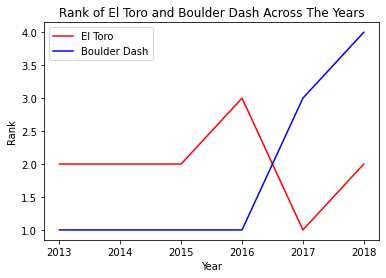

<Figure size 432x288 with 0 Axes>

In [5]:
# Create a plot of El Toro and Boulder dash hurricanes
def plot_two_roller_coasters(name1, name2, df, park_name1, park_name2):
    df1 = df[(df['Name'] == name1) & (df['Park'] == park_name1)]
    df2 = df[(df['Name'] == name2) & (df['Park'] == park_name2)]
    plt.plot(df1['Year of Rank'][df1['Name'] == name1], df1['Rank'][df1['Name'] == name1], color = 'red', label = name1)
    plt.plot(df2['Year of Rank'][df2['Name'] == name2], df2['Rank'][df2['Name'] == name2], color = 'blue', label = name2)
    plt.title('Rank of ' + name1 + ' and ' + name2 + ' Across The Years')
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.legend()
    plt.show()

el_toro_Boulder_cash = plot_two_roller_coasters('El Toro', 'Boulder Dash', wood_df, 'Six Flags Great Adventure', 'Lake Compounce')
plt.clf()

### Function to plot top n rankings over time

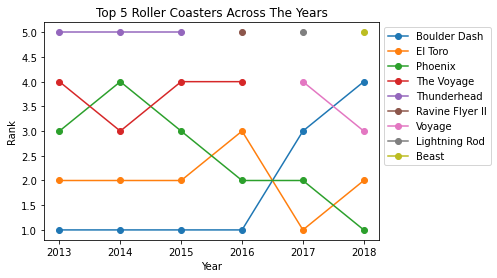

In [6]:
# 4
# Create a function to plot top n rankings over time
def plot_top_n_roller_coasters(df, n):
    df_n = df[df['Rank'] <= n]
  # print(df_n)
  # print(df_n['Year of Rank'][df_n['Name'] == 'El Toro'])
    for i in df_n['Name'].unique():
        plt.plot(df_n['Year of Rank'][df_n['Name'] == i], df_n['Rank'][df_n['Name'] == i], label = i, marker = 'o')
        plt.xlabel('Year')
        plt.ylabel('Rank')
        plt.title('Top 5 Roller Coasters Across The Years')
    plt.legend(bbox_to_anchor = (1, 1))
    plt.show()
    
# Create a plot of top n rankings over time
top_5_wood = plot_top_n_roller_coasters(wood_df, 5)


### Reading and inspecting roller coaster data

In [7]:
# 5
# load roller coaster data
coaster = pd.read_csv('roller_coasters.csv')
coaster.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


### Function to plot histogram of column values

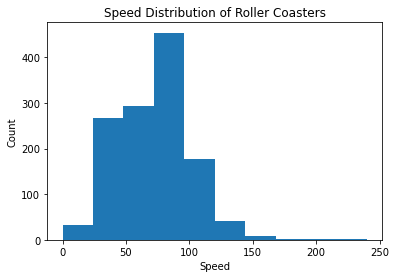

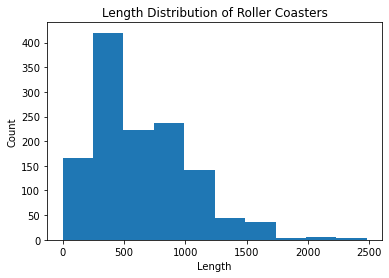

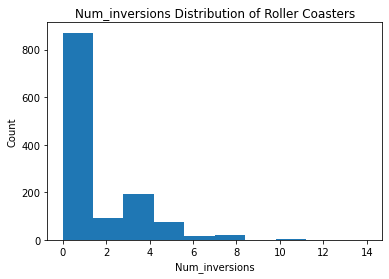

<Figure size 432x288 with 0 Axes>

In [8]:
# 6
# Create a function to plot histogram of column values
def plot_hist(df, col):
    df = df.dropna()
    if df[col].dtypes == 'float':
        plt.hist(df[col], range = (min(df[col]), max(df[col])))
        plt.title(col.capitalize() + ' Distribution of Roller Coasters')
        plt.xlabel(col.capitalize())
        plt.ylabel('Count')
        plt.show()
        plt.clf()
    
# Create histogram of roller coaster speed
speed = plot_hist(coaster, 'speed')

# Create histogram of roller coaster length
length = plot_hist(coaster, 'length')

# Create histogram of roller coaster number of inversions
num_inversions = plot_hist(coaster, 'num_inversions')

### Function to plot histogram of Height values

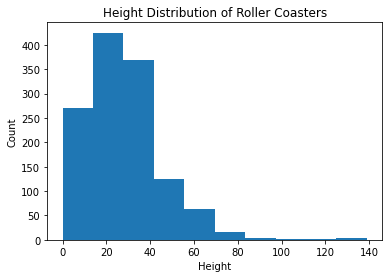

In [9]:
# Create a function to plot histogram of height values
def plot_height_hist(df, col):
    df = df.dropna()
    df = df[df[col] <= 140]
    plt.hist(df[col])
    plt.title(col.capitalize() + ' Distribution of Roller Coasters')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.show()
    
# Create a histogram of roller coaster height
heights = plot_height_hist(coaster, 'height')

### Function to plot inversions by coaster at park

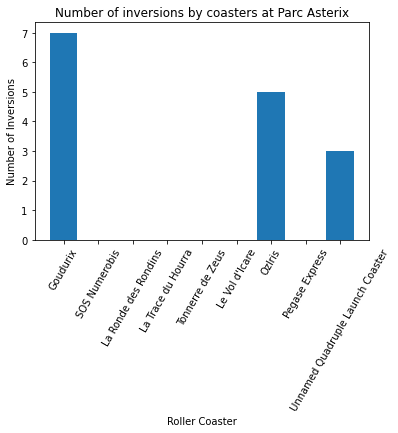

In [10]:
# 7
# Create a function to plot inversions by coaster at park
def plot_inversions_by_park(df, park_name):
    df = df.dropna()
    # print(df)
    df_park = df[df['park'] == park_name]
#     print(df_park)
    ax = plt.subplot()
    plt.bar(range(len(df_park['name'])), df_park['num_inversions'].values)
    ax.set_xticks(range(len(df_park['name'])))
    ax.set_xticklabels(df_park['name'].values, rotation = 60)
    plt.xlabel('Roller Coaster')
    plt.title('Number of inversions by coasters at ' + park_name)
    plt.ylabel('Number of Inversions')
    plt.show()

# Create barplot of inversions by roller coasters
parc_asterix = plot_inversions_by_park(coaster, 'Parc Asterix')


### Function to plot a pie chart of status.operating

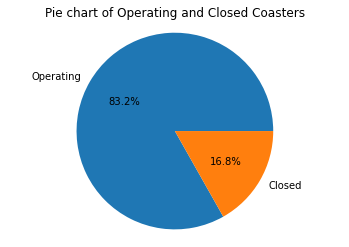

<Figure size 432x288 with 0 Axes>

In [13]:
# 8
# Create a function to plot a pie chart of status.operating
def pie_chart(df):
    status_counts = list([np.sum(df.status == 'status.operating'), np.sum(df.status == 'status.closed.definitely')])
    # print(operating)
    plt.pie(status_counts, labels = ['Operating', 'Closed'], autopct = '%0.1f%%')
    plt.title('Pie chart of Operating and Closed Coasters')
    plt.axis('equal')
    plt.show()

# Create pie chart of roller coasters
roller = pie_chart(coaster)
plt.clf()

### Function to plot scatter plot of any two columns

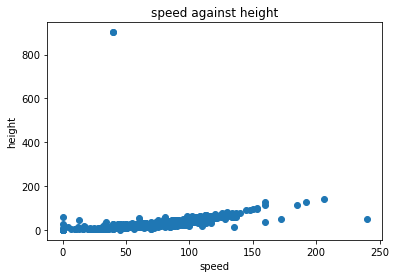

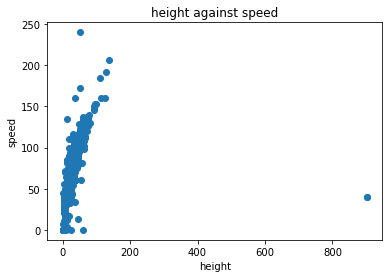

In [12]:
# 9
# Create a function to plot scatter of any two columns
def plot_scatter(df, col_1, col_2):
    if df[col_1].dtypes == 'float' and df[col_2].dtypes == 'float':
        plt.scatter(df[col_1], df[col_2])
        plt.xlabel(col_1)
        plt.ylabel(col_2)
        plt.title(col_1 + ' against ' + col_2)
        plt.show()
# Create a function to plot scatter of speed vs height
speed_by_height = plot_scatter(coaster, 'speed', 'height')
plt.clf()

# Create a scatter plot of roller coaster height by speed
height_by_speed = plot_scatter(coaster, 'height', 'speed')